C:\Users\pc081\AppData\Local\Temp\ipykernel_13504\49075122.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True, header=0)


Tên các cột trong DataFrame: ['Date', 'Close', 'Volume']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1469 non-null   datetime64[ns]
 1   Close   1469 non-null   float64       
 2   Volume  1469 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 34.6 KB
None
Số lượng giá trị thiếu trong mỗi cột:
Date      0
Close     0
Volume    0
dtype: int64


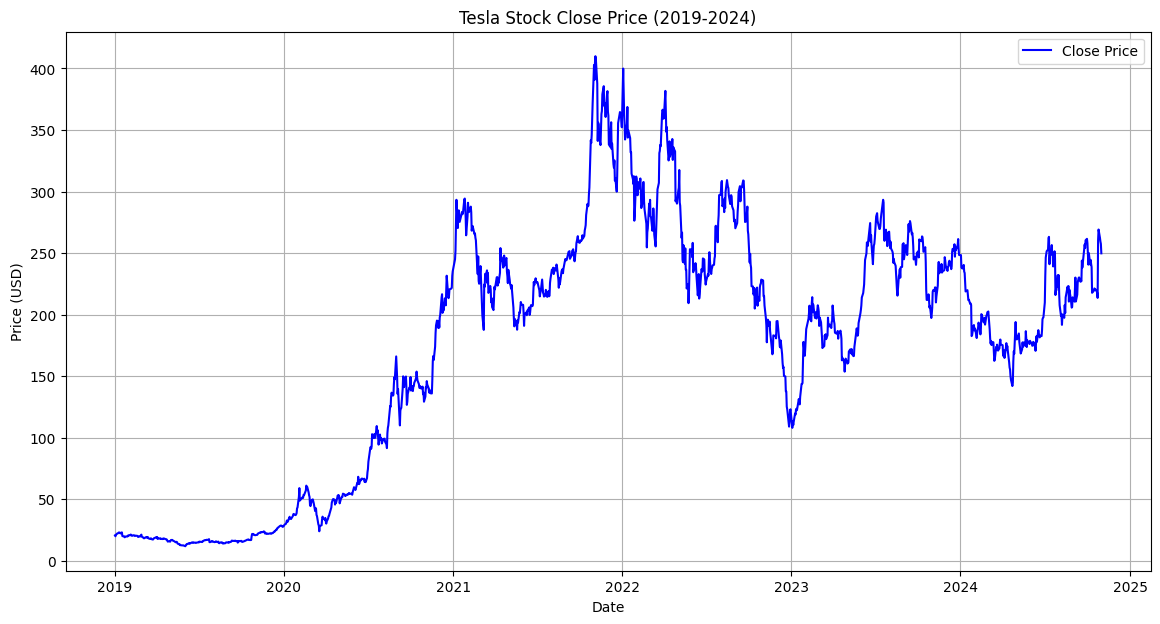

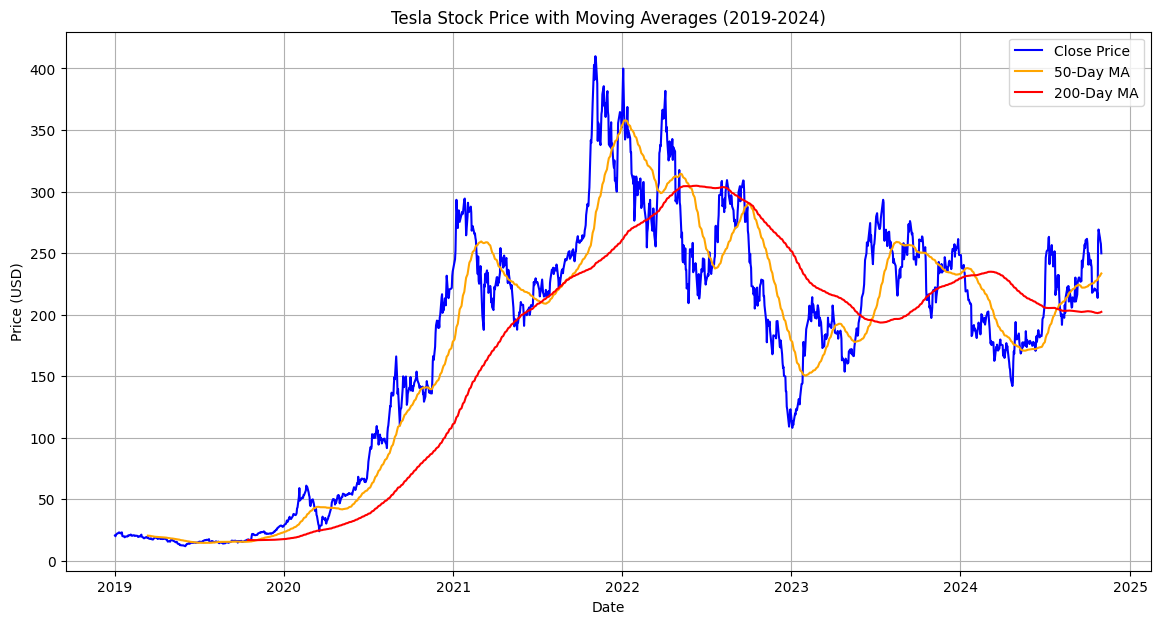

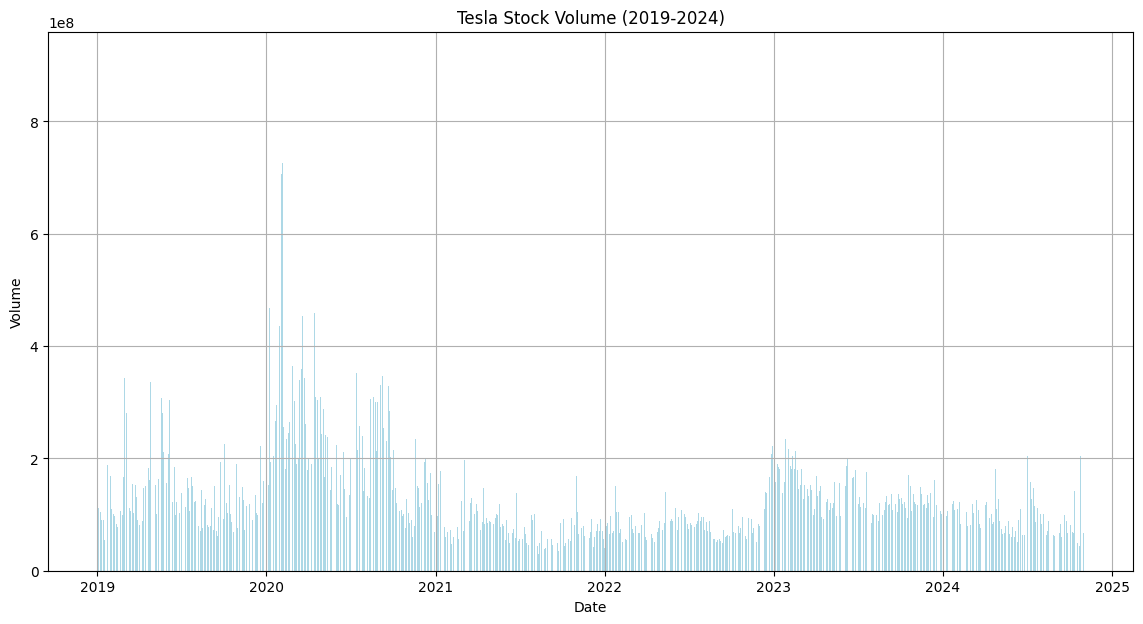

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn đến file CSV
file_path = r"F:\Dữ liệu thống kê\Tesla_2019_2024.csv"

# 1. Đọc dữ liệu từ file CSV
# Chỉ định định dạng ngày tháng dd-mm-yy khi đọc file
df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True, header=0)

# 2. Kiểm tra tên các cột
print("Tên các cột trong DataFrame:", df.columns.tolist())

# 3. Làm sạch tên cột để loại bỏ khoảng trắng
df.columns = df.columns.str.strip()

# 4. Kiểm tra lại thông tin DataFrame
print(df.info())

# 5. Kiểm tra có giá trị thiếu hay không
print("Số lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# 6. Điền giá trị thiếu bằng phương pháp Forward Fill
df.ffill(inplace=True)

# 7. Thiết lập cột Date làm index
df.set_index('Date', inplace=True)

# 8. Vẽ biểu đồ giá đóng cửa (Close Price)
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Tesla Stock Close Price (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# 9. Thêm các đường trung bình động (MA 50 và MA 200)
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# 10. Vẽ biểu đồ giá đóng cửa cùng với MA 50 và MA 200
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['MA200'], label='200-Day MA', color='red')
plt.title('Tesla Stock Price with Moving Averages (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# 11. Vẽ biểu đồ khối lượng giao dịch (Volume)
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'], color='lightblue')
plt.title('Tesla Stock Volume (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid()
plt.show()
